In [1]:
"""Data inspection."""

'Data inspection.'

In [78]:
import importlib
import os

import matplotlib
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

import analyze
importlib.reload(analyze)
import datasets
importlib.reload(datasets)
import train_utils
importlib.reload(train_utils)
import vis
importlib.reload(vis)

DATA_DIR = '/neuro/'
DATA_TYPE = 'conn_simu'

IMG_SHAPE = (15, 15)
SHAPE_STR = datasets.get_shape_string(IMG_SHAPE)
TRAIN_DATASET_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/%s_%s_%s.npy' % (
        'train', DATA_TYPE, SHAPE_STR))
VAL_DATASET_PATH = os.path.join(
    DATA_DIR, 'train_val_datasets/%s_%s_%s.npy' % (
        'val', DATA_TYPE, SHAPE_STR))

DATASET_PATH = TRAIN_DATASET_PATH
DATASET = np.load(DATASET_PATH)

OUTPUT = '/scratch/users/nmiolane/imoutput_connectomes_simu'
CMAP = 'Spectral'

In [11]:
dataset, _ = datasets.get_dataset_connectomes_simu(IMG_SHAPE)

Saving /neuro/train_val_datasets/train_conn_simu_15x15.npy...
Saving /neuro/train_val_datasets/val_conn_simu_15x15.npy...


In [12]:
print(dataset.shape)
print(np.min(dataset))
print(np.max(dataset))

(14250, 1, 15, 15)
-1.1752011936438012
1.8279224526315203


In [13]:
CORR_THRESH = 0.1

bools = np.zeros(len(dataset))
for i, mat in enumerate(dataset):
    #print(i)
    mat = mat[0]
    val, _ = np.linalg.eig(mat)
    bools[i] = min(val)
print(min(bools))

assert datasets.is_spd(dataset)

0.36787944117144233


Loading /neuro/train_val_datasets/train_conn_simu_15x15.npy
Dataset shape: (14250, 1, 15, 15)


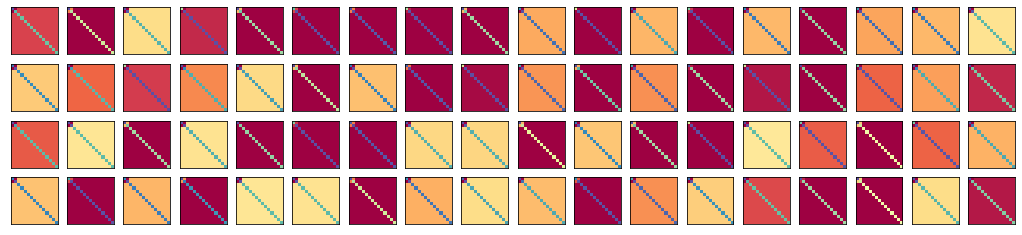

In [16]:
vis.show_data(DATASET_PATH, cmap=CMAP)

In [53]:
ckpt = train_utils.load_checkpoint(OUTPUT)
print('NN Architecture')
print(ckpt['nn_architecture'])
print('Training Parameters')
print(ckpt['train_params'])

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes_simu/train_vae/epoch_23_checkpoint.pth.
NN Architecture
{'data_dim': 120, 'img_shape': (1, 15, 15), 'latent_dim': 10, 'nn_type': 'fc', 'spd_feature': 'vector', 'with_sigmoid': False}
Training Parameters
{'beta2': 0.999, 'lr': 1e-05, 'reconstructions': 'l2', 'batch_size': 8, 'regularizations': ('kullbackleibler',), 'weights_init': 'xavier', 'beta1': 0.5}


Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes_simu/train_vae/epoch_46_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes_simu/train_vae/epoch_46_checkpoint.pth.


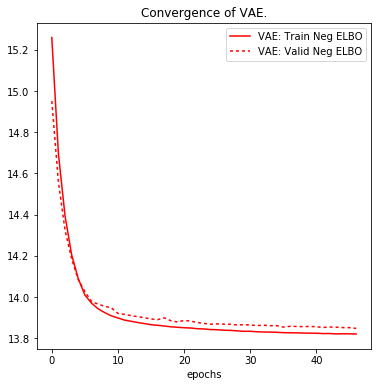

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax = vis.plot_convergence(ax, OUTPUT, algo_name='vae', crit_name='neg_elbo')

Loading /neuro/train_val_datasets/train_conn_simu_15x15.npy
Dataset shape: (14250, 1, 15, 15)
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes_simu/train_vae/epoch_55_checkpoint.pth.
Loading encoder from network of architecture: fc...
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes_simu/train_vae/epoch_55_checkpoint.pth.
Loading decoder from network of architecture: fc...
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes_simu/train_vae/epoch_55_checkpoint.pth.


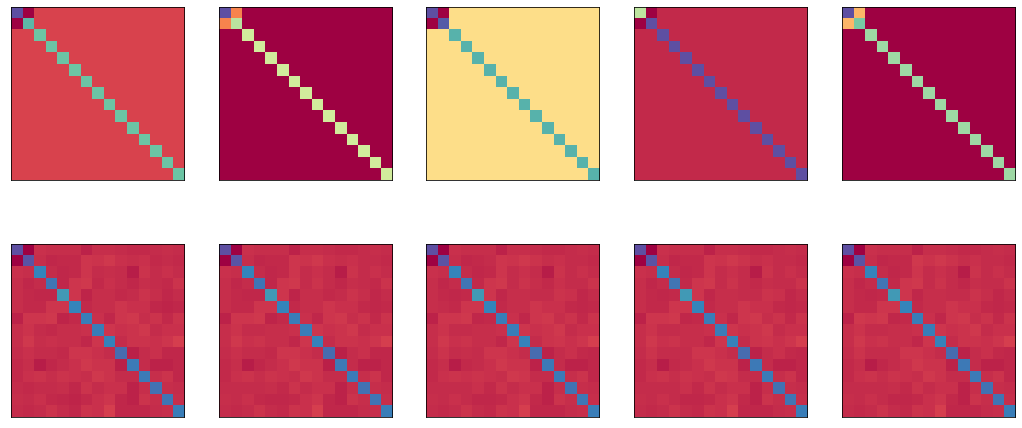

In [61]:
vis.show_img_and_recon(OUTPUT, DATASET_PATH, cmap=CMAP)

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes_simu/train_vae/epoch_158_checkpoint.pth.
Loading decoder from network of architecture: fc...
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes_simu/train_vae/epoch_158_checkpoint.pth.


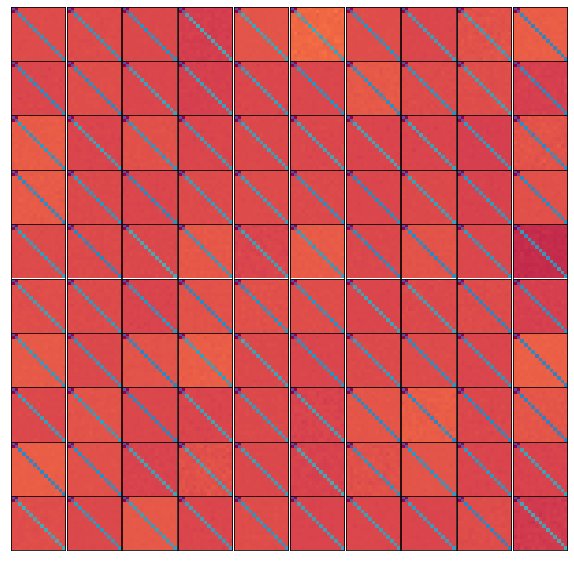

In [72]:
fig = plt.figure(figsize=(10, 10))
outer = gridspec.GridSpec(1, 1, wspace=0.1, hspace=0.1)

for i, algo_name in enumerate(['vae']):
    vis.show_samples_from_prior(
        OUTPUT, fig, outer, i, algo_name=algo_name, cmap=CMAP)
fig.show()

In [79]:
ax = vis.plot_variance_explained(OUTPUT, DATASET_PATH)

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes_simu/train_vae/epoch_159_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes_simu/train_vae/epoch_159_checkpoint.pth.
Loading encoder from network of architecture: fc...


RuntimeError: shape '[-1, 120]' is invalid for input of size 225

Found checkpoint. Getting: /scratch/users/nmiolane/imoutput_connectomes_simu/train_vae/epoch_50_checkpoint.pth.
Loading encoder from network of architecture: fc...


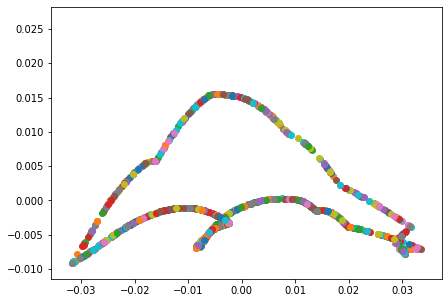

In [46]:
n_pcs = 2

mus = analyze.latent_projection(output=OUTPUT, dataset_path=DATASET_PATH)
_, projected_mus = analyze.pca_projection(mus, n_pcs)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

for mu in projected_mus[:1000]:
    if n_pcs == 2:
        im = ax.scatter(mu[0], mu[1]) 
    else:
        im = ax.scatter(mu[0], mu[1], mu[2])